# Import libraries and setup¶

In [1]:
# Import libraries we may need
import scanpy as sc
import numpy as np
import scipy as sp
#import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scanpy.external as sce
import wget
import dill
import umap
reducer = umap.UMAP()


/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squ

In [2]:
# Set up output figure settings
plt.rcParams['figure.figsize']=(128,128) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

# Save / restore environemnt

Use these functions to either save or load the environmental variables, otherwise you will lose all the objects between opening/closing Jupyter sessions!

In [ ]:
#save the session
dill.dump_session('BM_merged_SCANPY.db')

In [ ]:
#load the session
dill.load_session('DC_SCANPY.db')

# Save / restore anndata

In [3]:
import anndata as ad

# Load adata 
BM_query = ad.read_h5ad('./Merged_dataset/Whole dataset/BM_merged_query_processed.h5ad')

In [9]:
# Save adata object
BM_query.write('./Merged_dataset/Whole dataset/BM_merged_query_processed.h5ad')

In [4]:
BM_query

AnnData object with n_obs × n_vars = 99956 × 25113
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'UMI', 'Genes', 'sample_id', 'experiment_date', 'percent_ribo', 'percent_hb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'mapping.score', 'predicted.celltype.score', 'predicted.celltype', 'major_celltype.l2', 'predicted_ADT_snn_res.1', 'SCT.weight', 'predicted_ADT.weight', 'predicted.ADT.wsnn_res.1.5', 'SingleR.labels', 'SingleR.labels2', 'SingleR.labels3', 'harmony_clusters', 'WNN_clusters', 'CIPR_harmony_clusters', 'CIPR_WNN_clusters', 'dpt_pseudotime', 'palantir_pseudotime', 'palantir_entropy'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DM_EigenValues', 'SingleR.labels_colors'

In [ ]:
BM_query.var_names

# 1- Preprocessing 

In [ ]:
#sc.pp.filter_genes(BM_query, min_counts=20) # filtered out 6757 genes that are detected in less than 20 counts
sc.pp.normalize_total(BM_query)
sc.pp.log1p(BM_query)
sc.pp.highly_variable_genes(BM_query)
sc.tl.pca(BM_query)

In [ ]:
#Generate neighbors connectivities for UMAP based on harmony integration done in seurat
sc.pp.neighbors(BM_query,n_pcs = 40, use_rep="X_harmony")
sc.tl.umap(BM_query)

In [ ]:
sc.pl.umap(BM_query, color="sample_id", save = "UMAP_sampleID_harmony.pdf")

In [ ]:
# Test integrating with harmony here again
sce.pp.harmony_integrate(BM_query, "sample_id")

In [ ]:
BM_query

In [ ]:
sc.pp.neighbors(BM_query,n_pcs = 40, use_rep="X_pca_harmony")
sc.tl.umap(BM_query)

In [ ]:
sc.pl.umap(BM_query, color="sample_id", save = "UMAP_sampleID_new_harmony_scanpy.pdf")

In [ ]:
#Generate umap following the umap from the mapped reference - same as the one ploted in Seurat
sc.pl.embedding(BM_query, basis = "X_proj.umap",color="predicted.celltype.l2", save = "UMAP_predicted.celltype.l2.pdf")

In [ ]:
sc.pl.embedding(BM_query, basis = "X_proj.umap",color="SingleR.labels", save = "UMAP_SingleR.labels.pdf")

# 2- Pseudotime construction

To calculate diffusion pseudotime (DPT), first, the corresponding diffusion maps need to be calculated.

In [ ]:
sc.tl.diffmap(BM_query)

In [ ]:
#Plot diffmap to verify the dimension that better represents the root cells
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["predicted.celltype.l2"],
    components=[1, 2], save = "Diffmap_predicted.celltype.l2.pdf")

In [ ]:
#Plot diffmap to verify the dimension that better represents the root cells
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["predicted.celltype.l2"], groups = ["HSC"],
    components=[1, 2], save ="UMAP_predicted.celltype.l2_HSC.pdf")

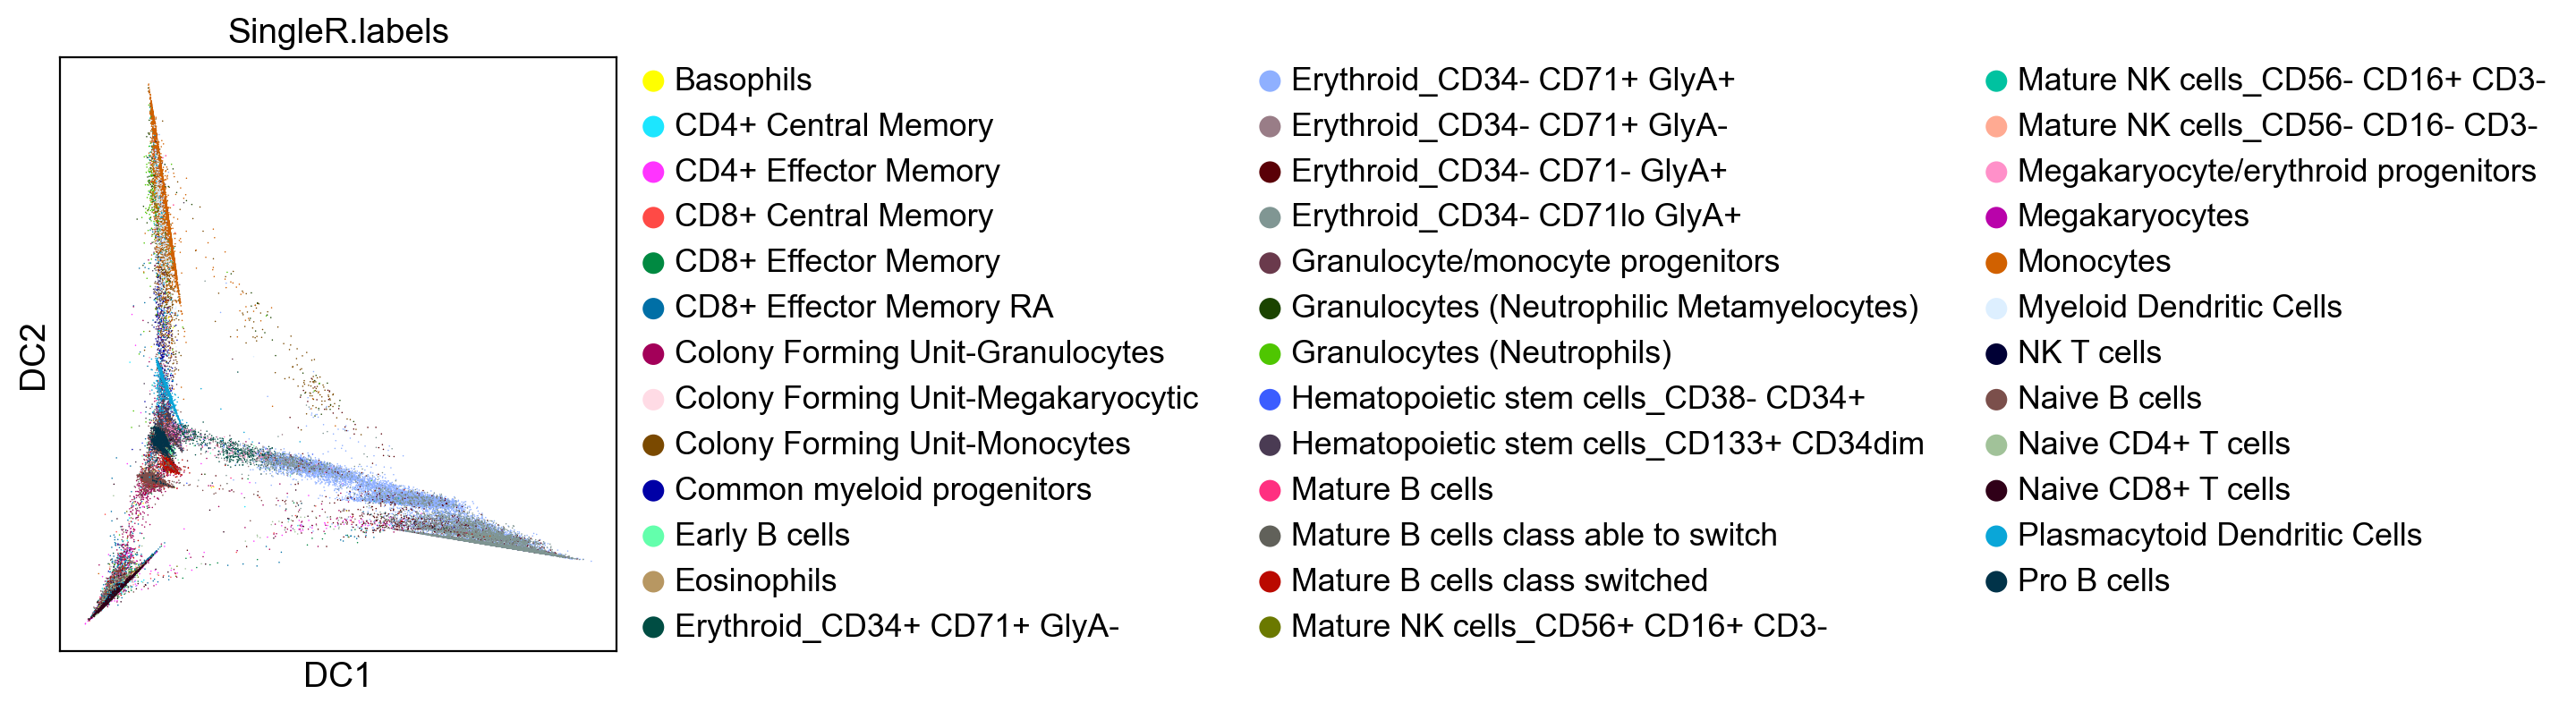

In [7]:
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["SingleR.labels"],
    components=[1, 2], save = "Diffmap_SingleR.labels.pdf")

#save = "Diffmap_SingleR.labels.pdf"

In [ ]:
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["SingleR.labels"], groups = ["Hematopoietic stem cells_CD133+ CD34dim"],
    components=[1, 2], save ="UMAP_SingleRlabels_HSCCD133PosCD34dim.pdf")

#save ="UMAP_predicted.celltype.l2_HSC.pdf"

In [ ]:
# Setting root cell as described above
root_ixs = BM_query.obsm["X_diffmap"][:, 2].argmin()
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["SingleR.labels"],
    components=[1, 2],
)

BM_query.uns["iroot"] = root_ixs

# 3- Diffusion pseudotime (DPT) and Palantir

In [ ]:
# Alternatively define root cell as below:
BM_query.uns["iroot"] = np.flatnonzero(BM_query.obs["SingleR.labels"] == "Hematopoietic stem cells_CD38- CD34+")[0] #or
#BM_query.uns["iroot"] = np.flatnonzero(BM_query.obs["SingleR.labels"] == "Hematopoietic stem cells_CD133+ CD34dim")[0] #or 
#BM_query.uns["iroot"] = np.flatnonzero(BM_query.obs["predicted.celltype.l2"] == "HSC")[0]

In [ ]:
# Infer progression of cells through the pseudotime from a snapshot data. 
# This runs the diffusion pseudotime analysis - capable to deal with disconnected graphs and can be run in a hierarchical mode (n_branchings > 1).
# It is recommended to only use dpt for computing pseudotime (N_branchings=0) and to detect branchings via paga().
# For pseudotime, you need to annotate your data with a root cell. For example, the HSC types detected above.
sc.tl.dpt(BM_query)

In [ ]:
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["dpt_pseudotime"],
    color_map="gnuplot2", save = "DPT_pseudotime.HSCCD133CD34.pdf"
)

In [ ]:
sc.pl.embedding(BM_query, basis = "X_proj.umap",color="dpt_pseudotime", color_map="gnuplot2", save = "UMAP_DPT_pseudotime_HSCCD133CD34.pdf")

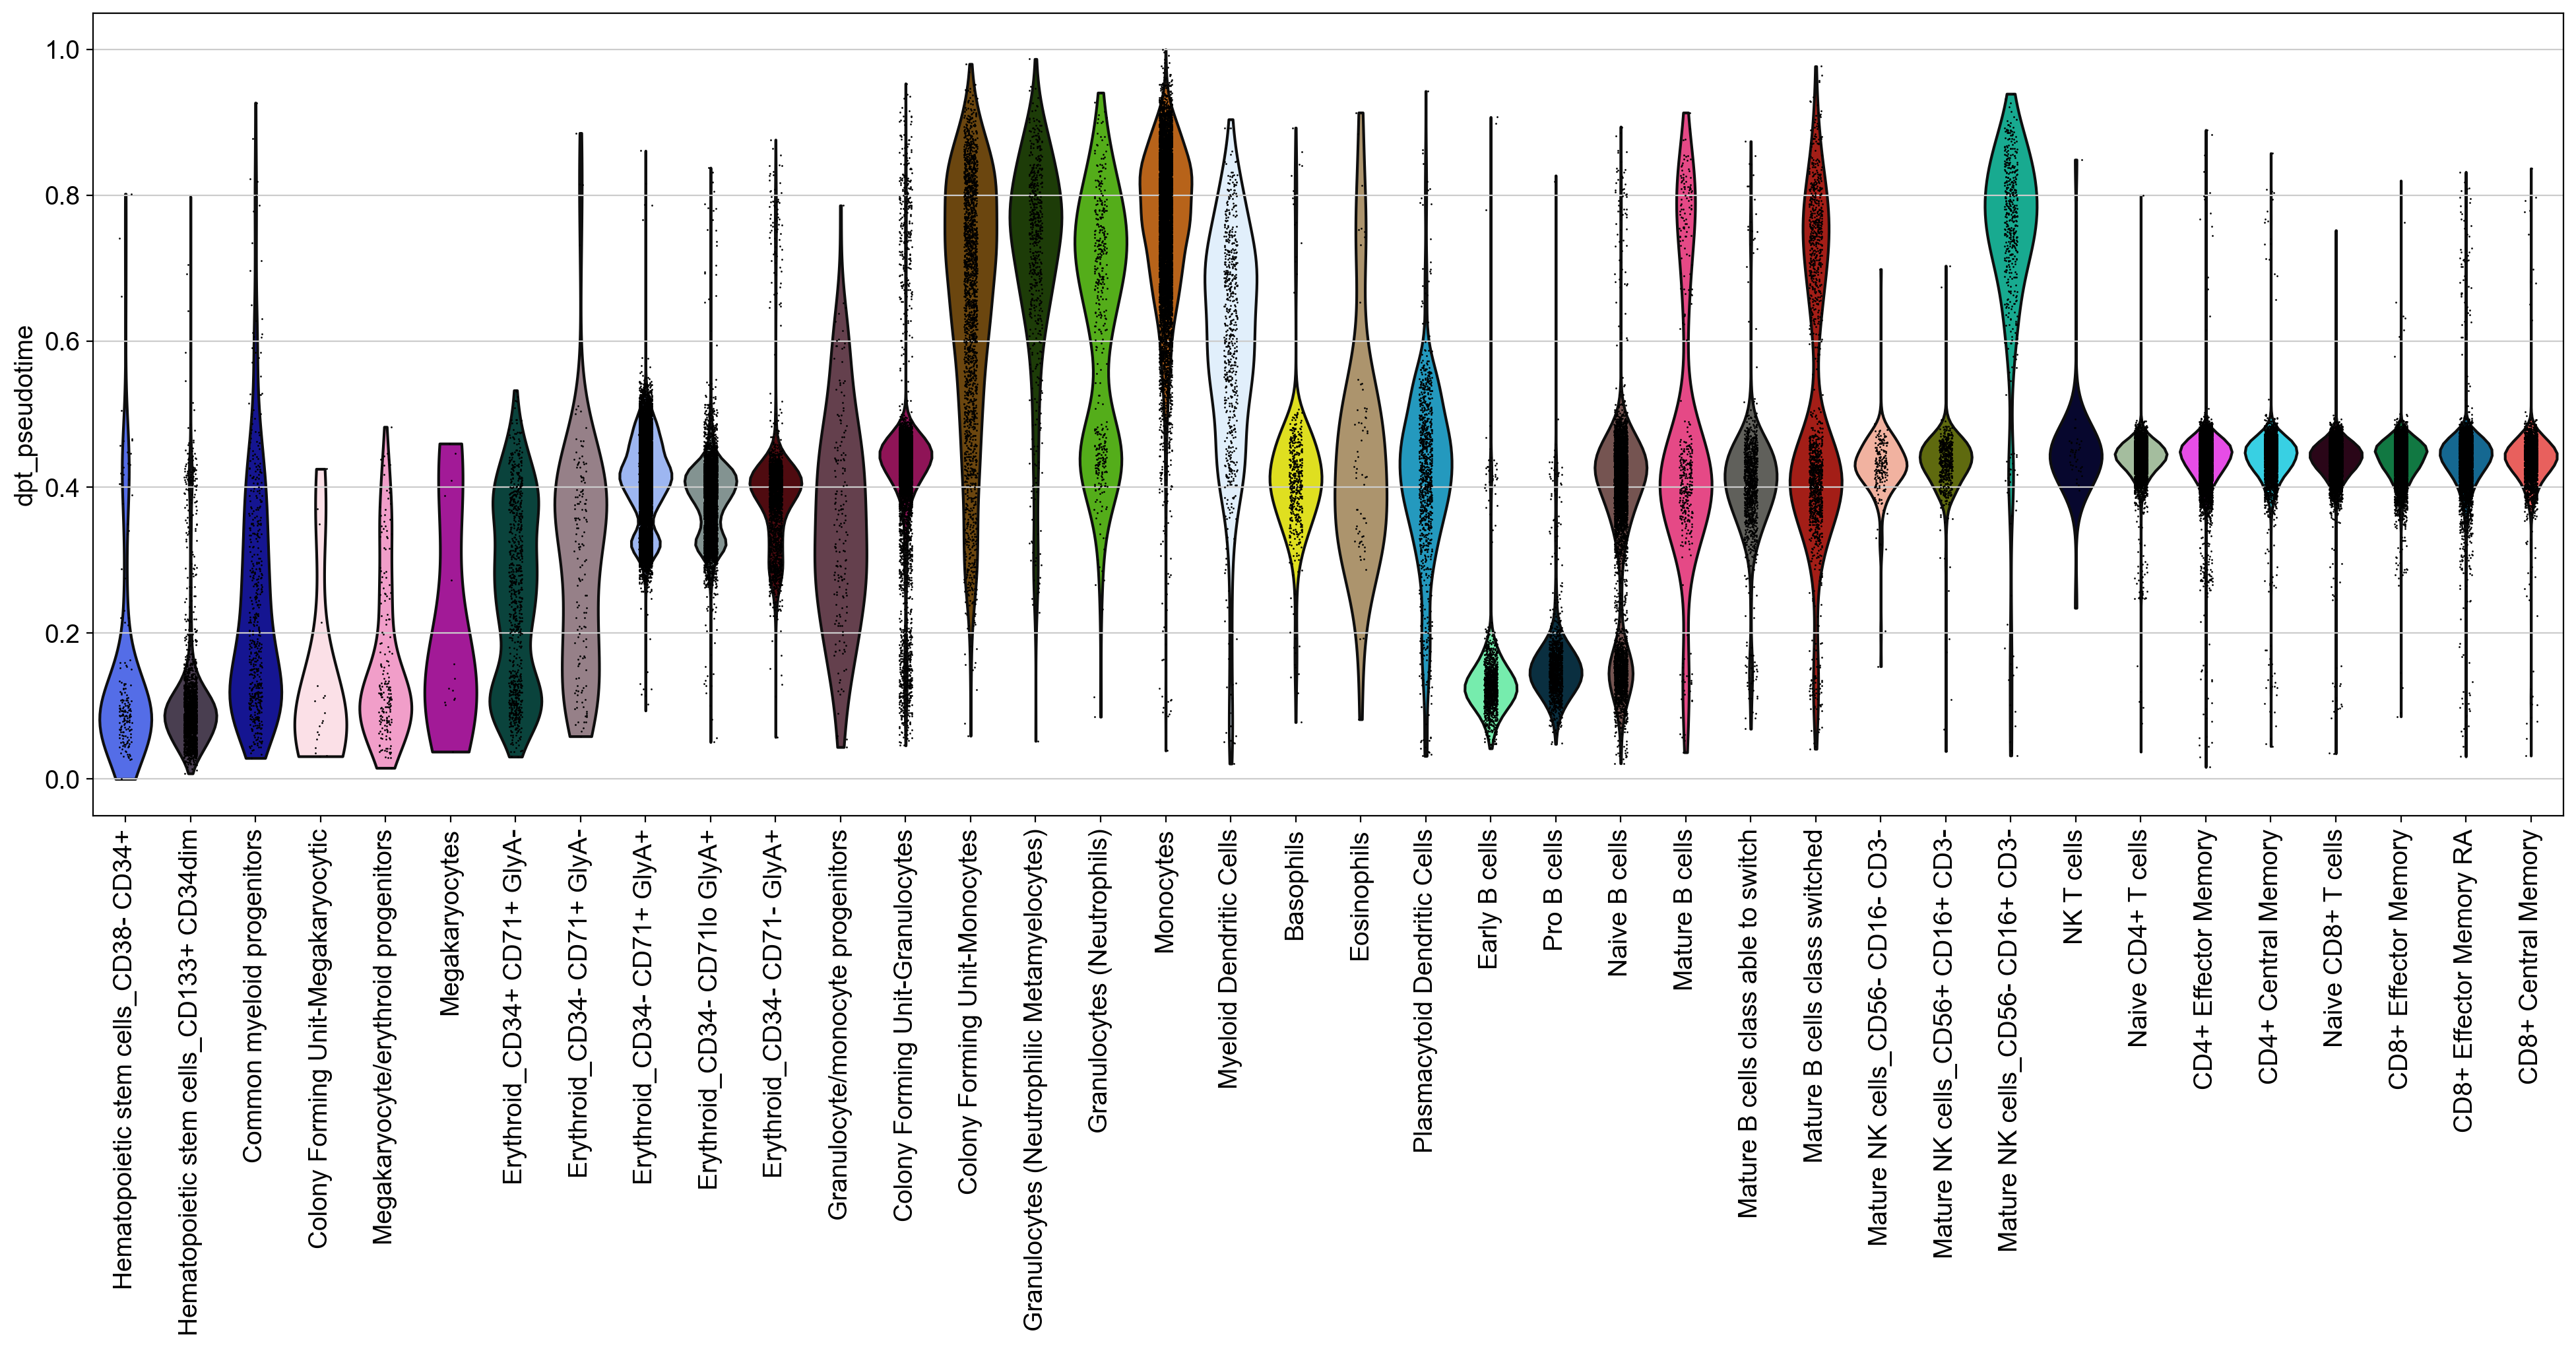

In [8]:
_, ax = plt.subplots(figsize=(24, 8))
sc.pl.violin(
    BM_query,
    keys=["dpt_pseudotime"],
    groupby="SingleR.labels",
    rotation=90, ax=ax, order = ["Hematopoietic stem cells_CD38- CD34+", "Hematopoietic stem cells_CD133+ CD34dim", "Common myeloid progenitors",
        "Colony Forming Unit-Megakaryocytic", "Megakaryocyte/erythroid progenitors", "Megakaryocytes", 
         "Erythroid_CD34+ CD71+ GlyA-",  "Erythroid_CD34- CD71+ GlyA-", "Erythroid_CD34- CD71+ GlyA+", "Erythroid_CD34- CD71lo GlyA+", "Erythroid_CD34- CD71- GlyA+",
        "Granulocyte/monocyte progenitors", "Colony Forming Unit-Granulocytes", "Colony Forming Unit-Monocytes",
        "Granulocytes (Neutrophilic Metamyelocytes)", "Granulocytes (Neutrophils)", "Monocytes", "Myeloid Dendritic Cells","Basophils", "Eosinophils", "Plasmacytoid Dendritic Cells",
        "Early B cells", "Pro B cells", "Naive B cells", "Mature B cells", "Mature B cells class able to switch", "Mature B cells class switched", "Mature NK cells_CD56- CD16- CD3-",
         "Mature NK cells_CD56+ CD16+ CD3-", "Mature NK cells_CD56- CD16+ CD3-", "NK T cells", "Naive CD4+ T cells", "CD4+ Effector Memory", "CD4+ Central Memory",
        "Naive CD8+ T cells", "CD8+ Effector Memory", "CD8+ Effector Memory RA", "CD8+ Central Memory"], save = "DPT_pseudotime.HSCCD38CD34_violin.pdf")

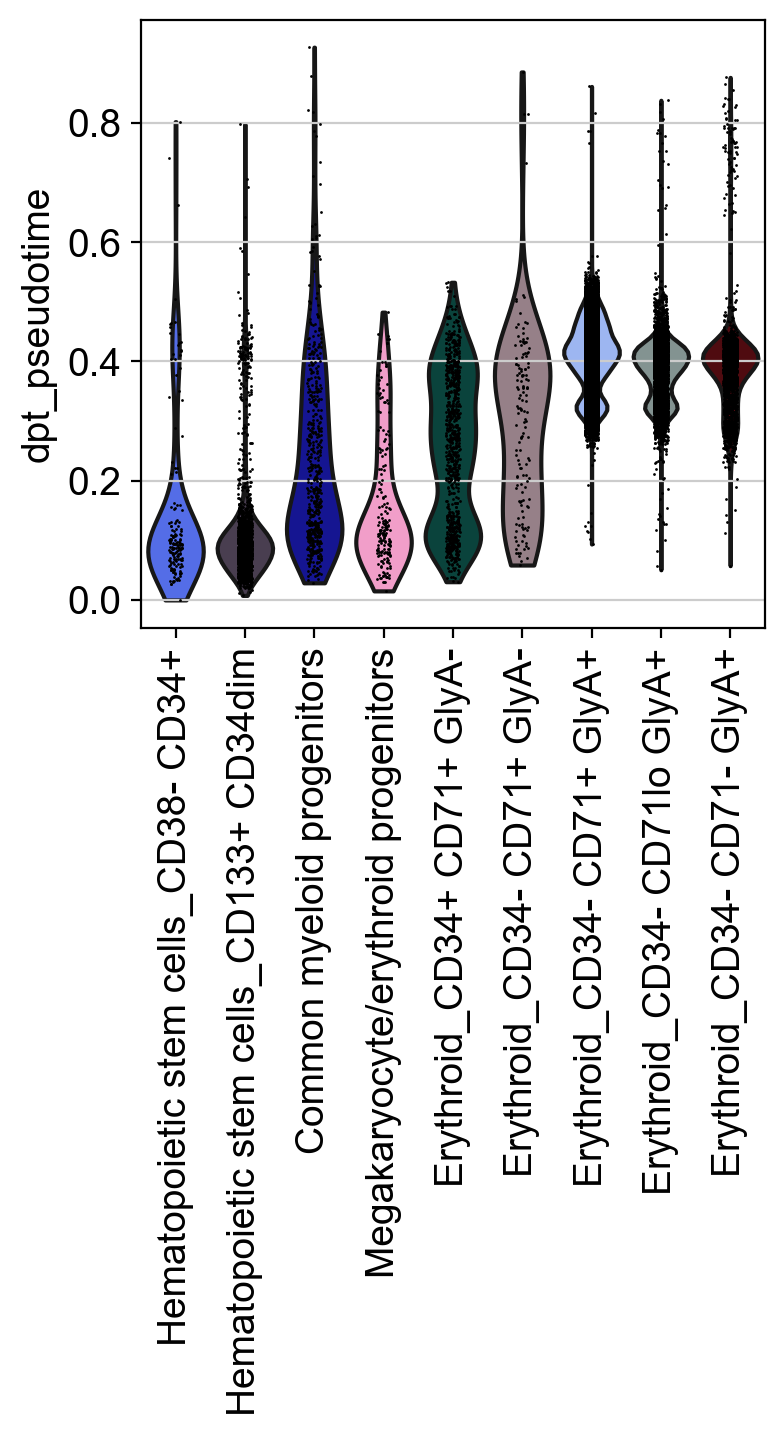

In [13]:
# only erythroid trajectory - this same plot in CellRank seemed to produce better results
_, ax = plt.subplots(figsize=(4, 4))
sc.pl.violin(
    BM_query,
    keys=["dpt_pseudotime"],
    groupby="SingleR.labels",
    rotation=90, ax=ax, order = ["Hematopoietic stem cells_CD38- CD34+", "Hematopoietic stem cells_CD133+ CD34dim", "Common myeloid progenitors",
        "Megakaryocyte/erythroid progenitors", "Erythroid_CD34+ CD71+ GlyA-", 
        "Erythroid_CD34- CD71+ GlyA-", "Erythroid_CD34- CD71+ GlyA+", "Erythroid_CD34- CD71lo GlyA+",
        "Erythroid_CD34- CD71- GlyA+"], save = "DPT_pseudotime_erythroid_violin.pdf")

In [6]:
BM_query

AnnData object with n_obs × n_vars = 99956 × 25113
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'UMI', 'Genes', 'sample_id', 'experiment_date', 'percent_ribo', 'percent_hb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'mapping.score', 'predicted.celltype.score', 'predicted.celltype', 'major_celltype.l2', 'predicted_ADT_snn_res.1', 'SCT.weight', 'predicted_ADT.weight', 'predicted.ADT.wsnn_res.1.5', 'SingleR.labels', 'SingleR.labels2', 'SingleR.labels3', 'harmony_clusters', 'WNN_clusters', 'CIPR_harmony_clusters', 'CIPR_WNN_clusters', 'dpt_pseudotime', 'palantir_pseudotime', 'palantir_entropy'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DM_EigenValues', 'SingleR.labels_colors'

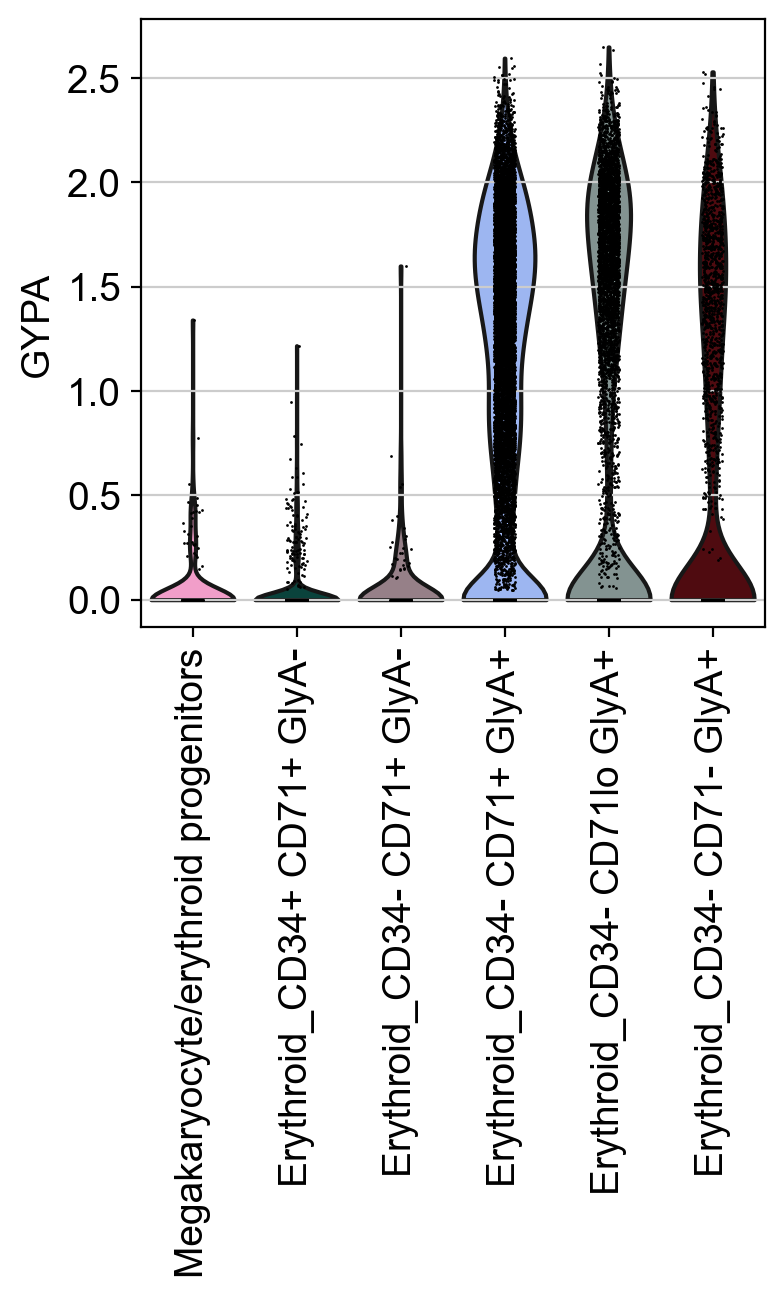

In [24]:
_, ax = plt.subplots(figsize=(4, 4))
sc.pl.violin(
    BM_query,
    keys=["GYPA"],
    groupby="SingleR.labels",
    rotation=90, ax=ax, order = ["Megakaryocyte/erythroid progenitors", "Erythroid_CD34+ CD71+ GlyA-", 
        "Erythroid_CD34- CD71+ GlyA-", "Erythroid_CD34- CD71+ GlyA+", "Erythroid_CD34- CD71lo GlyA+",
        "Erythroid_CD34- CD71- GlyA+"], save = "GYPA_erythroid_violin.pdf")

Analysis with palantir

Reference: https://github.com/dpeerlab/Palantir/blob/master/notebooks/Palantir_sample_notebook.ipynb

In [ ]:
import palantir

In [ ]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(BM_query, n_components=5)

In [ ]:
ms_data = palantir.utils.determine_multiscale_space(BM_query)

In [ ]:
# MAGIC imputation
# MAGIC is an imputation technique developed in the Pe'er lab for single cell data imputation. 
#Palantir uses MAGIC to impute the data for visualization and determining gene expression trends.

imputed_X = palantir.utils.run_magic_imputation(BM_query)

In [ ]:
sc.pl.embedding(
    BM_query,
    basis="X_proj.umap",
    layer="MAGIC_imputed_data",
    color=["CD34", "MPO", "GATA1", "IRF8"],
    frameon=False, save = "MAGIC_imputed_data.pdf"
)
plt.show()


In [ ]:
#Diffusion maps visualization
#The computed diffusion components can be visualized with the following snippet.

palantir.plot.plot_diffusion_components(BM_query)
plt.show()

In [ ]:
BM_query

In [ ]:
BM_query2 = BM_query[BM_query.obs["SingleR.labels"].isin(['Hematopoietic stem cells_CD38- CD34+']),:].copy()

In [ ]:
BM_query2.obs

In [ ]:
#Running Palantir
#Palantir can be run by specifying an approxiate early cell.
#Palantir can automatically determine the terminal states as well.

start_cell = "HD_BM1.2_TGGGCGTAGCGCTGAA-1"
pr_res = palantir.core.run_palantir(
    BM_query, start_cell, num_waypoints=500
)


In [ ]:
BM_query

In [ ]:
sc.pl.scatter(
    BM_query,
    basis="diffmap",
    color=["palantir_pseudotime"],
    color_map="gnuplot2", save = "Palantir_pseudotime.HSCCD38CD34.pdf"
)

In [ ]:
sc.pl.embedding(BM_query, basis = "X_proj.umap",color="palantir_pseudotime", color_map="gnuplot2", save = "UMAP_PAlantir_pseudotime_HSCCD38CD34.pdf")

In [ ]:
sc.pl.embedding(BM_query, basis = "X_proj.umap",color="palantir_entropy", color_map="gnuplot2", save = "UMAP_palantir_entropy_HSCCD38CD34.pdf")

In [ ]:
_, ax = plt.subplots(figsize=(24, 8))
sc.pl.violin(
    BM_query,
    keys=["palantir_pseudotime"],
    groupby="SingleR.labels",
    rotation=90, ax=ax, order = ["Hematopoietic stem cells_CD38- CD34+", "Hematopoietic stem cells_CD133+ CD34dim", "Common myeloid progenitors",
        "Colony Forming Unit-Megakaryocytic", "Megakaryocyte/erythroid progenitors", "Megakaryocytes", 
         "Erythroid_CD34+ CD71+ GlyA-",  "Erythroid_CD34- CD71+ GlyA-", "Erythroid_CD34- CD71+ GlyA+", "Erythroid_CD34- CD71lo GlyA+", "Erythroid_CD34- CD71- GlyA+",
        "Granulocyte/monocyte progenitors", "Colony Forming Unit-Granulocytes", "Colony Forming Unit-Monocytes",
        "Granulocytes (Neutrophilic Metamyelocytes)", "Granulocytes (Neutrophils)", "Monocytes", "Myeloid Dendritic Cells","Basophils", "Eosinophils", "Plasmacytoid Dendritic Cells",
        "Early B cells", "Pro B cells", "Naive B cells", "Mature B cells", "Mature B cells class able to switch", "Mature B cells class switched", "Mature NK cells_CD56- CD16- CD3-",
         "Mature NK cells_CD56+ CD16+ CD3-", "Mature NK cells_CD56- CD16+ CD3-", "NK T cells", "Naive CD4+ T cells", "CD4+ Effector Memory", "CD4+ Central Memory",
        "Naive CD8+ T cells", "CD8+ Effector Memory", "CD8+ Effector Memory RA", "CD8+ Central Memory"], save = "Palantir_pseudotime.HSCCD38CD34_violin.pdf")

In [ ]:
_, ax = plt.subplots(figsize=(24, 8))
sc.pl.violin(
    BM_query,
    keys=["palantir_entropy"],
    groupby="SingleR.labels",
    rotation=90, ax=ax, order = ["Hematopoietic stem cells_CD38- CD34+", "Hematopoietic stem cells_CD133+ CD34dim", "Common myeloid progenitors",
        "Colony Forming Unit-Megakaryocytic", "Megakaryocyte/erythroid progenitors", "Megakaryocytes", 
         "Erythroid_CD34+ CD71+ GlyA-",  "Erythroid_CD34- CD71+ GlyA-", "Erythroid_CD34- CD71+ GlyA+", "Erythroid_CD34- CD71lo GlyA+", "Erythroid_CD34- CD71- GlyA+",
        "Granulocyte/monocyte progenitors", "Colony Forming Unit-Granulocytes", "Colony Forming Unit-Monocytes",
        "Granulocytes (Neutrophilic Metamyelocytes)", "Granulocytes (Neutrophils)", "Monocytes", "Myeloid Dendritic Cells","Basophils", "Eosinophils", "Plasmacytoid Dendritic Cells",
        "Early B cells", "Pro B cells", "Naive B cells", "Mature B cells", "Mature B cells class able to switch", "Mature B cells class switched", "Mature NK cells_CD56- CD16- CD3-",
         "Mature NK cells_CD56+ CD16+ CD3-", "Mature NK cells_CD56- CD16+ CD3-", "NK T cells", "Naive CD4+ T cells", "CD4+ Effector Memory", "CD4+ Central Memory",
        "Naive CD8+ T cells", "CD8+ Effector Memory", "CD8+ Effector Memory RA", "CD8+ Central Memory"], save = "Palantir_entropy.HSCCD38CD34_violin.pdf")

# 4- Pseudotime gene paths

In [ ]:
# See codes in the Palantir tutorials

In [ ]:
paths = [('Erythrocytes', ['Hematopoietic stem cells_CD38- CD34+', 'Hematopoietic stem cells_CD133+ CD34dim', 'Megakaryocyte/erythroid progenitors', 'Erythroid_CD34- CD71+ GlyA-', 'Erythroid_CD34+ CD71+ GlyA-', 'Erythroid_CD34- CD71+ GlyA+', 'Erythroid_CD34- CD71lo GlyA+', 'Erythroid_CD34- CD71- GlyA+']),
         ('Neutrophils', ['Hematopoietic stem cells_CD38- CD34+', 'Hematopoietic stem cells_CD133+ CD34dim','Common myeloid progenitors', 'Granulocyte/monocyte progenitors', 'Granulocytes (Neutrophilic Metamyelocytes)', 'Granulocytes (Neutrophils)']),
         ('Monocytes', ['Hematopoietic stem cells_CD38- CD34+', 'Hematopoietic stem cells_CD133+ CD34dim','Common myeloid progenitors', 'Granulocyte/monocyte progenitors', 'Colony Forming Unit-Monocytes', 'Monocytes']),
         ('B cells', ['Hematopoietic stem cells_CD38- CD34+', 'Hematopoietic stem cells_CD133+ CD34dim','Early B cells', 'Pro B cells', 'Naive B cells', 'Mature B cells class able to switch', 'Mature B cells class switched', 'Mature B cells'])]

In [ ]:
# Select some of the marker gene names.
gene_names = ['GATA1', 'GATA2', 'KLF1', 'EPOR', 'TFRC', 'ITGA4', 'GYPA',  # erythroid
              'ELANE', 'CEBPE', 'GFI1',                    # neutrophil
              'IRF8', 'CSF1R', 'CTSG', 'CEBPB', 'CSF3R',     # monocyte
            'PAX5', 'EBF1']                                               # b cell

In [ ]:
BM_query

In [ ]:
BM_query.obs['distance'] = BM_query.obs['dpt_pseudotime']

In [ ]:
BM_query.obs['clusters'] = BM_query.obs['SingleR.labels']  # just a cosmetic change

In [ ]:
BM_query.uns['clusters_colors'] = BM_query.uns['SingleR.labels_colors']

In [ ]:
_, axs = plt.subplots(ncols=4, figsize=(6, 6), gridspec_kw={'wspace': 0.1, 'left': 0.2})
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        BM_query, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('.csv'.format(descr))
plt.savefig('.pdf')
plt.show()

# 5- PAGA

In [ ]:
# this is was run based on the default umap projection 
sc.tl.draw_graph(BM_query)

In [ ]:
sc.pl.draw_graph(BM_query, color='SingleR.labels', legend_loc='right margin')

In [ ]:
sc.tl.paga(BM_query, groups='SingleR.labels')

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
sc.pl.paga(BM_query, node_size_scale=2, node_size_power=0.2, layout='fa',
           edge_width_scale=0.05, fontweight='normal', fontsize=6, threshold=1, show=False, ax=ax) #save='predicted_celltype_l2.pdf'

Denoising the graph and Recomputing the embedding using a specific UMAP-initialization 

In [ ]:
#Draw FA2 graph based on the UMAP proj.UMAP from the reference dataset
sc.tl.draw_graph(BM_query, init_pos='X_proj.umap')

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
sc.pl.draw_graph(BM_query, color='SingleR.labels', legend_loc='right margin', save = "FA2_proj.UMAP.pdf", ax=ax)

In [ ]:
sc.tl.paga(BM_query, groups='SingleR.labels')

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
sc.pl.paga(BM_query, node_size_scale=2, node_size_power=0.2, layout='fa',
           edge_width_scale=0.05, fontweight='normal', fontsize=6, threshold=1, show=False, ax=ax)  #save = "Raw_PAGA.pdf

Draw graph based on diffusion pseudotime

In [ ]:
# Choose a root cell 
BM_query.uns['iroot'] = np.flatnonzero(BM_query.obs['SingleR.labels']  == 'Hematopoietic stem cells_CD38- CD34+')[0]

In [ ]:
sc.tl.dpt(BM_query)

In [ ]:
_, ax = plt.subplots(figsize=(12, 12))
sc.pl.draw_graph(BM_query, color=['SingleR.labels'], legend_fontsize='x-small',
                 legend_fontweight='light',legend_loc='on data', show=False, ax=ax, size=8, save = "FA2_proj.UMAP_v2.pdf")
#save='SingleR_draw_graph_fa_v2'

In [ ]:
sc.pl.draw_graph(BM_query, color=['dpt_pseudotime'], color_map="gnuplot2", legend_loc='on data', save = "FA2_DPT.pdf")


Denoising the graph using diffusion time and recomputing the embedding  with PAGA-initialization

In [5]:
#sc.tl.diffmap(BM_query, n_comps=15)
sc.pp.neighbors(BM_query, n_neighbors=10, use_rep='X_diffmap')

computing neighbors


/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)


In [6]:
sc.tl.draw_graph(BM_query, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (2:19:53)


/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


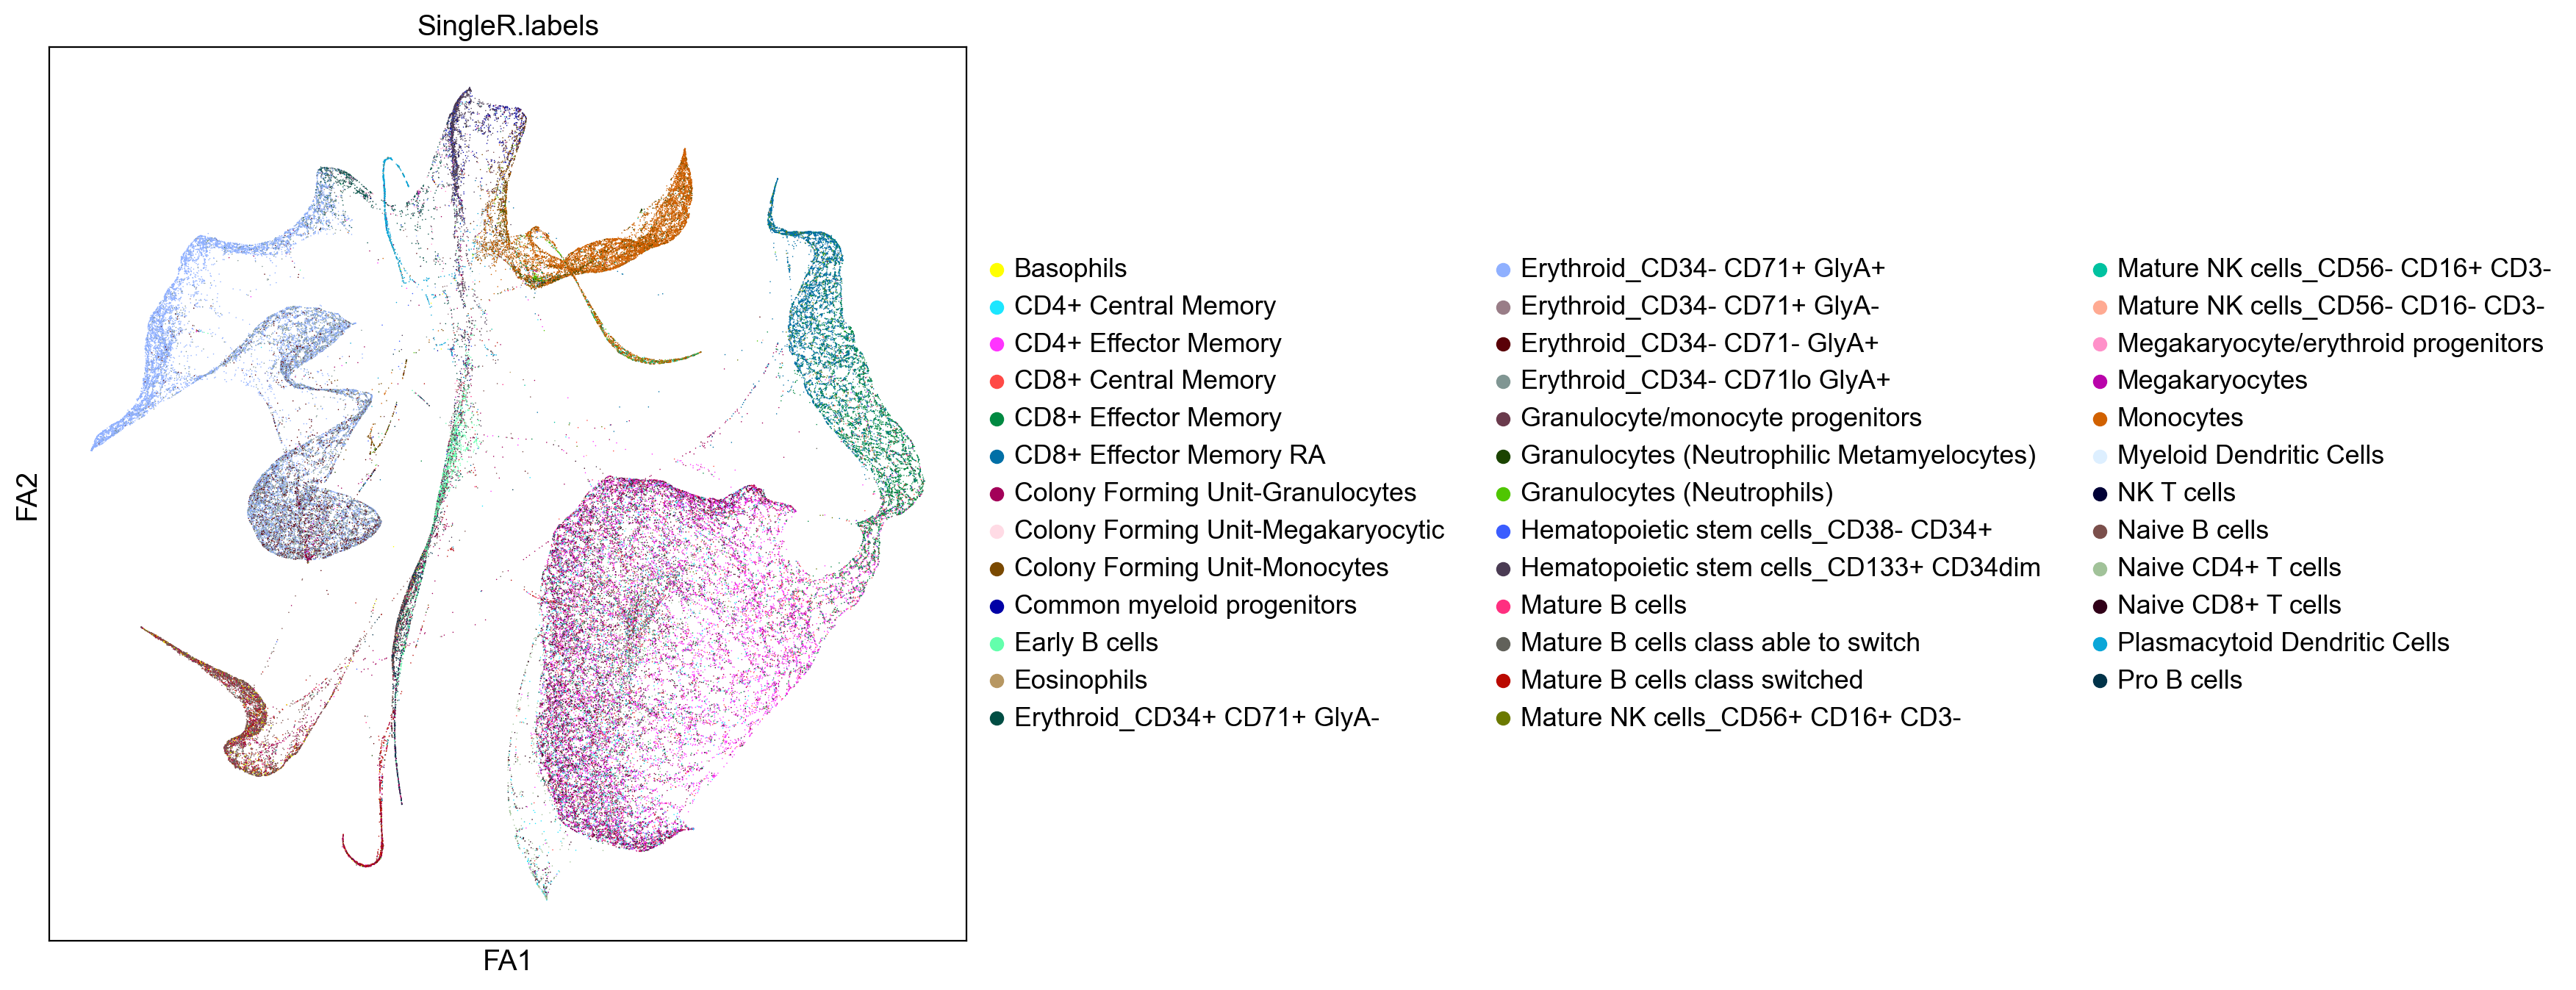

In [8]:
_, ax = plt.subplots(figsize=(8, 8))
sc.pl.draw_graph(BM_query, color='SingleR.labels', legend_loc='right margin', save = "FA2_diffmap.pdf", ax=ax)